## Data Analysis on Online Retail Dataset with Groupby

1. Find out which customers placed the most and fewest orders. 
2. Find out which countries placed the fewest orders. 
3. Find out which customers spent the most money.
4. Find out which customer spent the most money on one item. 
5. Find out which month had the most orders 
6. What is the most ordered product by country?


In [1]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#load the dataset 
df = pd.read_csv(r"C:\Users\senay\Downloads\online_retail_II 2010.csv",encoding='latin1')
df= df[df['Quantity']>0]
df.head()    


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.insert(6,"Total",df['Quantity']*df['Price'])
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Total,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,20.34,17850.0,United Kingdom


<AxesSubplot:xlabel='Customer ID'>

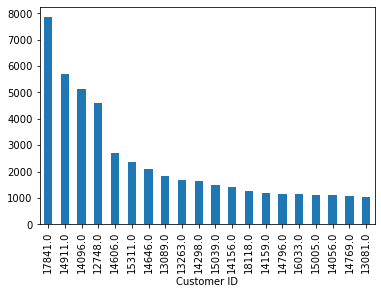

In [4]:
df.groupby('Customer ID')['Invoice'].count().sort_values(ascending=False).head(20).plot(kind='bar')

In [5]:
df.groupby('Customer ID')['Invoice'].count().sort_values(ascending=False).tail(5)

Customer ID
15940.0    1
15823.0    1
15802.0    1
15753.0    1
12346.0    1
Name: Invoice, dtype: int64

In [6]:
df.groupby('Country')['Invoice'].count().sort_values(ascending=False).head(5)

Country
United Kingdom    486286
Germany             9042
France              8409
EIRE                7894
Spain               2485
Name: Invoice, dtype: int64

In [7]:
df.groupby(['Customer ID','Country'], as_index=False)['Invoice'].count().sort_values(by = 'Invoice' , ascending=False).head(10)

,Customer ID,Country,Invoice
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700
2185,15311.0,United Kingdom,2379
1698,14646.0,Netherlands,2080
570,13089.0,United Kingdom,1818
699,13263.0,United Kingdom,1677
1443,14298.0,United Kingdom,1637


In [8]:
df.groupby(['Customer ID','Country'], as_index=False)['Total'].sum().sort_values(by = 'Total' , ascending=False).head(10)

,Customer ID,Country,Total
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06
57,12415.0,Australia,124914.53
1342,14156.0,EIRE,117379.63
3780,17511.0,United Kingdom,91062.38
2711,16029.0,United Kingdom,81024.84
0,12346.0,United Kingdom,77183.60


In [76]:
df.groupby(['Description'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False).head(20)

,Description,Quantity
2401,"PAPER CRAFT , LITTLE BIRDIE",80995
2065,MEDIUM CERAMIC TOP STORAGE JAR,78033
3950,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
1827,JUMBO BAG RED RETROSPOT,48478
3860,WHITE HANGING HEART T-LIGHT HOLDER,37895
2695,POPCORN HOLDER,36761
229,ASSORTED COLOUR BIRD ORNAMENT,36461
2351,PACK OF 72 RETROSPOT CAKE CASES,36419
2755,RABBIT NIGHT LIGHT,30788
2120,MINI PAINT SET VINTAGE,26633


In [10]:
df.groupby(['Customer ID','Description'])["Price"].max().sort_values(ascending=False).head(20)

Customer ID  Description                   
16029.0      POSTAGE                           8142.75
12536.0      Manual                            4161.06
12744.0      Manual                            3949.32
15502.0      Manual                            3155.95
15581.0      Manual                            2500.00
17846.0      Manual                            2033.10
17940.0      Manual                            1867.86
14911.0      Manual                            1687.17
14096.0      DOTCOM POSTAGE                    1599.26
12757.0      Manual                            1241.98
12669.0      Manual                            1136.30
18087.0      Manual                             852.80
12748.0      Manual                             850.50
12432.0      POSTAGE                            700.00
15098.0      PICNIC BASKET WICKER 60 PIECES     649.50
15299.0      Manual                             600.00
13810.0      Manual                             599.50
17444.0      POSTAGE 

In [11]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Total          float64
Customer ID    float64
Country         object
dtype: object

In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Total                 float64
Customer ID           float64
Country                object
dtype: object

In [13]:
df['Month']= df['InvoiceDate'].dt.month
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Total,Customer ID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,12


<AxesSubplot:xlabel='Month'>

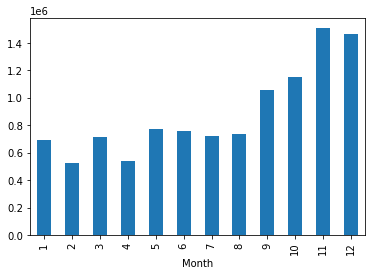

In [14]:
df.groupby('Month')['Total'].sum().plot(kind='bar')

In [84]:
df.groupby(['Country','Description'], as_index=False)['Invoice'].count().sort_values(by = 'Invoice' , ascending=False).reset_index().drop_duplicates('Country',keep='first')

,index,Country,Description,Invoice
0,19441,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2231
293,8280,Germany,POSTAGE,374
419,6613,France,POSTAGE,301
1402,3415,EIRE,CARRIAGE,106
1530,1406,Belgium,POSTAGE,96
1969,13712,Spain,POSTAGE,62
2422,10974,Netherlands,POSTAGE,37
2447,5464,Finland,POSTAGE,37
2606,15018,Switzerland,POSTAGE,31
2632,12497,Portugal,POSTAGE,30


In [86]:
df.groupby(['Country','Description'], as_index=False)['Quantity'].max().sort_values(by='Quantity', ascending=False).reset_index().drop_duplicates('Country',keep='first')



,index,Country,Description,Quantity
0,17989,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",80995
13,10976,Netherlands,RABBIT NIGHT LIGHT,2400
17,10193,Japan,RABBIT NIGHT LIGHT,2040
34,3237,EIRE,ASSORTED INCENSE PACK,1440
61,287,Australia,MINI PAINT SET VINTAGE,1152
75,6622,France,RABBIT NIGHT LIGHT,912
99,14121,Sweden,12 PENCILS SMALL TUBE RED RETROSPOT,768
162,7295,Germany,ASSORTED COLOURS SILK FAN,600
208,1844,Canada,RETRO COFFEE MUGS ASSORTED,504
311,2182,Channel Islands,RAIN PONCHO,407
